<a href="https://colab.research.google.com/github/PilHyunPark/Data-Analysis-with-Open-Source/blob/main/%EB%AC%B81_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import requests
import pandas as pd

def GetEnergyUseAmount(searchDate):
    api_key = '744342496f68797538364376797549'
    url = 'http://openapi.seoul.go.kr:8088/' + api_key + '/json/energyUseDataSummaryInfo/1/5/' + serchdDate

    response = requests.get(url)
    return response.json();

In [68]:
# 1-2
for year in range(2015, 2025):
    for month in range(1,13) :
        serchdDate = str(year) + '/' + str(month).zfill(2)
        year = serchdDate[0: 4]
        month = serchdDate[5: 7]

        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['energyUseDataSummaryInfo']['row'])
        cdf =  df.loc[df['MM_TYPE'] == '개인', ['YEAR','MON','MM_TYPE', 'EUS','GUS','WUS','HUS']]
        print(cdf)


   YEAR MON MM_TYPE        EUS       GUS           WUS           HUS
0  2015  01      개인  193784708  59133720  12819757.886  22740838.937
   YEAR MON MM_TYPE        EUS       GUS           WUS           HUS
0  2015  02      개인  189974230  56487358  12656888.218  18793320.213
Empty DataFrame
Columns: [YEAR, MON, MM_TYPE, EUS, GUS, WUS, HUS]
Index: []
Empty DataFrame
Columns: [YEAR, MON, MM_TYPE, EUS, GUS, WUS, HUS]
Index: []
   YEAR MON MM_TYPE        EUS       GUS           WUS          HUS
0  2015  05      개인  177289769  22060892  13086734.214  1320895.801
   YEAR MON MM_TYPE        EUS       GUS           WUS         HUS
2  2015  06      개인  186073153  12677645  14241651.402  294312.634
   YEAR MON MM_TYPE        EUS      GUS           WUS         HUS
4  2015  07      개인  165114568  8893640  12083879.038  702863.645
   YEAR MON MM_TYPE        EUS      GUS           WUS         HUS
0  2015  08      개인  242000479  7619018  15164553.742  460288.965
Empty DataFrame
Columns: [YEAR, MON, M

In [91]:
for year in range(2015, 2016):
    for month in range(1,13) :
        serchdDate = str(year) + '/' + str(month).zfill(2)
        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['energyUseDataSummaryInfo']['row'])

        for idx in range(len(df)):
            dfRow = df.iloc[idx]
            mmType = str(dfRow['MM_TYPE'])  #유형
            if mmType == "개인":
                print(serchdDate)
                print('eus = ' + str(dfRow['EUS']))  #현년 전기
                print('gus = ' + str(dfRow['GUS']))  #현년 가스
                print('wus = ' + str(dfRow['WUS']))  #현년 수도
                print('hus = ' + str(dfRow['HUS']))  #현년 난방
            else:
                continue

2015/01
eus = 193784708
gus = 59133720
wus = 12819757.886
hus = 22740838.937
2015/02
eus = 189974230
gus = 56487358
wus = 12656888.218
hus = 18793320.213
2015/05
eus = 177289769
gus = 22060892
wus = 13086734.214
hus = 1320895.801
2015/06
eus = 186073153
gus = 12677645
wus = 14241651.402
hus = 294312.634
2015/07
eus = 165114568
gus = 8893640
wus = 12083879.038
hus = 702863.645
2015/08
eus = 242000479
gus = 7619018
wus = 15164553.742
hus = 460288.965
2015/10
eus = 186473958
gus = 8924018
wus = 14711828.766
hus = 3167520.127
2015/12
eus = 203388142
gus = 40095231
wus = 13904162.958
hus = 21102616.717


In [ ]:
# 2-1
for year in range(2015, 2025):
    for month in range(1,13) :
        serchdDate = str(year) + '/' + str(month).zfill(2)
        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data)
        print(df)

                                           energyUseDataSummaryInfo
list_total_count                                                  7
RESULT                {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}
row               [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인'...
                                           energyUseDataSummaryInfo
list_total_count                                                  7
RESULT                {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}
row               [{'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인'...
                                           energyUseDataSummaryInfo
list_total_count                                                  7
RESULT                {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}
row               [{'YEAR': '2015', 'MON': '03', 'MM_TYPE': '학교'...
                                           energyUseDataSummaryInfo
list_total_count                                                  7
RESULT                {'CODE': 'INFO-000', 'MESS

In [48]:
# 2-2
for year in range(2015, 2016):
    for month in range(1,13) :
        serchdDate = str(year) + '/' + str(month).zfill(2)
        year = serchdDate[0: 4]
        month = serchdDate[5: 7]
        season = ''

        list1 = ['03','04','05']
        list2 = ['06','07','08']
        list3 = ['09','10','11']
        list4 = ['12','01','02']

        if month in list1:
            season = '봄'
        elif month in list2:
            season = '여름'
        elif month in list3:
            season = '가을'
        elif month in list4:
            season = '겨울'

        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['energyUseDataSummaryInfo']['row'])
        cdf =  df.loc[df['MM_TYPE'] == '개인', ['YEAR','MON','MM_TYPE', 'EUS','GUS','WUS','HUS']]
        cdf['SEASON'] = season
        print(cdf)


   YEAR MON MM_TYPE        EUS       GUS           WUS           HUS SEASON
0  2015  01      개인  193784708  59133720  12819757.886  22740838.937     겨울
   YEAR MON MM_TYPE        EUS       GUS           WUS           HUS SEASON
0  2015  02      개인  189974230  56487358  12656888.218  18793320.213     겨울
Empty DataFrame
Columns: [YEAR, MON, MM_TYPE, EUS, GUS, WUS, HUS, SEASON]
Index: []
Empty DataFrame
Columns: [YEAR, MON, MM_TYPE, EUS, GUS, WUS, HUS, SEASON]
Index: []
   YEAR MON MM_TYPE        EUS       GUS           WUS          HUS SEASON
0  2015  05      개인  177289769  22060892  13086734.214  1320895.801      봄
   YEAR MON MM_TYPE        EUS       GUS           WUS         HUS SEASON
2  2015  06      개인  186073153  12677645  14241651.402  294312.634     여름
   YEAR MON MM_TYPE        EUS      GUS           WUS         HUS SEASON
4  2015  07      개인  165114568  8893640  12083879.038  702863.645     여름
   YEAR MON MM_TYPE        EUS      GUS           WUS         HUS SEASON
0  2015  08

In [83]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,792 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126666 files and dire

2015년 01월=288479024.823
2015년 02월=277911796.431
2015년 03월=0
2015년 04월=0
2015년 05월=213758291.015
2015년 06월=213286762.036
2015년 07월=186794950.683
2015년 08월=265244339.707
2015년 09월=0
2015년 10월=213277324.893
2015년 11월=0
2015년 12월=278490152.675
2015 yearUseSum = 1937242642.263
['2015']
[1937242642.263]
2016년 01월=313377443.569
2016년 02월=320322568.337
2016년 03월=290733196.477
2016년 04월=261217276.672
2016년 05월=233455182.139
2016년 06월=233290784.350
2016년 07월=0
2016년 08월=0
2016년 09월=266537516.652
2016년 10월=225273207.673
2016년 11월=246808044.481
2016년 12월=0
2016 yearUseSum = 2391015220.350
['2015', '2016']
[1937242642.263, 2391015220.35]
2017년 01월=319406511.372
2017년 02월=331177453.798
2017년 03월=297759921.469
2017년 04월=0
2017년 05월=267757752.994
2017년 06월=0
2017년 07월=0
2017년 08월=320690116.095
2017년 09월=256464449.315
2017년 10월=230105566.285
2017년 11월=267220361.529
2017년 12월=0
2017 yearUseSum = 2290582132.857
['2015', '2016', '2017']
[1937242642.263, 2391015220.35, 2290582132.857]
2018년 01월=0
2018년 02월

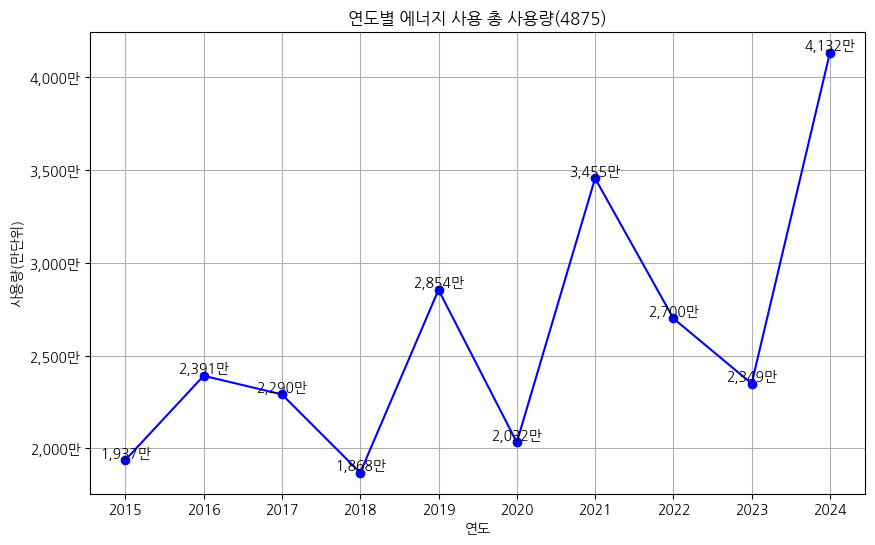

In [19]:
# 3-1
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import missingno as msno
from decimal import Decimal

def millions(x, pos):
    return f"{int(x):,}만"  # 소수점 없이 천단위 콤마 + M

plt.rc('font', family='NanumGothic')

yearsX = []
valuesY = []
# yearsX =['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
# valuesY =[1937242642.263, 2391015220.35, 2290582132.857, 1868485903.443, 2854433083.176, 2032166353.616, 3455636697.416, 2700389680.108, 2349018269.901, 4132733801.904]

for year in range(2015, 2025):

    useSum = 0
    yearUseSum = 0

    for month in range(1,13) :
        serchdDate = str(year) + '/' + str(month).zfill(2)
        year = serchdDate[0: 4]
        month = serchdDate[5: 7]

        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['energyUseDataSummaryInfo']['row'])
        cdf =  df.loc[df['MM_TYPE'] == '개인', ['YEAR','MON','MM_TYPE','EUS','GUS','WUS','HUS']]

        cols = ['EUS', 'GUS', 'WUS', 'HUS']
        useSum = sum(cdf[col].apply(Decimal) for col in cols)

        month_sum = useSum.sum()  # 한 달 총합
        print(f"{year}년 {month}월={month_sum}")

        yearUseSum += month_sum

    print(str(year) + " yearUseSum = " + str(yearUseSum))
    yearsX.append(year)
    valuesY.append(float(yearUseSum))

    print(yearsX)
    print(valuesY)

# 값 단위를 백만 단위로 변환
values_million = [round(v / 1_000_000, 2) for v in valuesY]

plt.figure(figsize=(10,6))
plt.plot(yearsX, values_million, marker='o', linestyle='-', color='blue')

for x, y in zip(yearsX, values_million):
    plt.text(x, y, f"{int(y):,}만", fontsize=10, ha='center', va='bottom')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.title("연도별 에너지 사용 총 사용량(4875)")
plt.xlabel("연도")
plt.ylabel("사용량(만단위)")
plt.grid(True)

In [ ]:
import requests
import pandas as pd
## 2015년 1월 ~ 2024년 12월 전국 평균 에너지 사용금액 데이터 수집

def GetEnergyUseAmount(searchDate):
    api_key = '94d36f3144e4055ff21d7412ddbab8617380adce25c0fc3d29733a1e944b1046'
    url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2?serviceKey=' \
            + api_key + '&searchDate=' + searchDate

    response = requests.get(url)
    return response.json();

for year in range(2015, 2025):
    for month in range(1,13) :
        serchdDate = str(year) + str(month).zfill(2)
        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['response']['body'])
        print(serchdDate)
        print(df)

201501
           item
heat        532
waterHot    132
gas           5
elect       674
waterCool   176
201502
           item
heat        435
waterHot    126
gas           5
elect       639
waterCool   174
201503
           item
heat        329
waterHot    123
gas           4
elect       532
waterCool   173


KeyboardInterrupt: 

In [ ]:
import pandas as pd

for year in range(2015, 2025):
    for month in range(1,13) :
        serchdDate = str(year) + str(month).zfill(2)
        year = serchdDate[0: 4]
        month = serchdDate[4: 6]
        season = ''

        list1 = ['03','04','05']
        list2 = ['06','07','08']
        list3 = ['09','10','11']
        list4 = ['12','01','02']

        if month in list1:
            season = '봄'
        elif month in list2:
            season = '여름'
        elif month in list3:
            season = '가을'
        elif month in list4:
            season = '겨울'

        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['response']['body'])
        df['year'] = year
        df['season'] = season
        print(df)


           item  year season
heat        532  2015     겨울
waterHot    132  2015     겨울
gas           5  2015     겨울
elect       674  2015     겨울
waterCool   176  2015     겨울
           item  year season
heat        435  2015     겨울
waterHot    126  2015     겨울
gas           5  2015     겨울
elect       639  2015     겨울
waterCool   174  2015     겨울
           item  year season
heat        329  2015      봄
waterHot    123  2015      봄
gas           4  2015      봄
elect       532  2015      봄
waterCool   173  2015      봄
           item  year season
heat        157  2015      봄
waterHot    106  2015      봄
gas           3  2015      봄
elect       554  2015      봄
waterCool   180  2015      봄
           item  year season
heat         51  2015      봄
waterHot     88  2015      봄
gas           2  2015      봄
elect       506  2015      봄
waterCool   184  2015      봄
           item  year season
heat         29  2015     여름
waterHot     63  2015     여름
gas           2  2015     여름
elect       53

In [92]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

yearList = []
useList = []

for year in range(2015, 2018):
    useSum = 0
    yearUseSum = 0
    for month in range(1,13) :
        serchdDate = str(year) + str(month).zfill(2)
        data = GetEnergyUseAmount(serchdDate)
        df = pd.DataFrame(data['response']['body'])
        useSum = df['item']['heat'] + df['item']['waterHot'] + df['item']['gas'] + df['item']['elect'] + df['item']['waterCool']
        # print(str(serchdDate) + " useSum = " + str(useSum))
        yearUseSum = yearUseSum + useSum
    print(str(year) + " yearUseSum = " + str(yearUseSum))
    yearList.append(year)
    useList.append(yearUseSum)

# 테이블로 만들기

# useList['date'] = pd.to_datetime(useList['date'])
# plt.figure(figsize=(12, 6))
# plt.plot(useList['date'], useList['dcoilwtico'])
# plt.title("연도별 에너지 사용 총금액 변화량 - 4875")
# plt.xlabel("연도")
# plt.ylabel("사용 총금액")
# plt.grid(True)
# plt.show()


KeyError: 'response'